<a href="https://colab.research.google.com/github/ismailsangu/IE423-TASK_1/blob/main/Value%20of%20Player.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#475468'> Current value of a football player:</font>


## Initialize

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dfValue = pd.read_csv('/content/drive/MyDrive/Data_Sets/final_data.csv')

In [5]:
dfValue.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
dfValue.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


## Fit a Regression Model to Predict Value

In [7]:
# Assign independent(Y) and dependent(X) variables
X = dfValue.loc[:,['age','goals','assists','minutes played','award','highest_value']]
Y = dfValue.loc[:,['current_value']]

In [8]:
# Fit linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [9]:
# Display regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [5435058.85054263]
Coefficients: 
 [[-2.39418016e+05  4.12399478e+05  5.15132911e+05  5.49179114e+02
  -3.50965837e+05  5.94460753e-01]]


In [10]:
# Generate new prediction - aka run scoring model
New_age = 25
New_goals = 0.3
New_assists = 0.15
New_minutes_played = 120
New_award = 150
New_highest_value = 100000000
print ('Predicted Current Value: \n', regr.predict([[New_age ,New_goals ,New_assists, New_minutes_played, New_award, New_highest_value]]))

Predicted Current Value: 
 [[6517699.54296203]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


utexas_ds_orie_divider_gray.png

## EDA PART

#### Histogram of values where the bins cover $1000000 increments to see distribution of players according to their current_values:

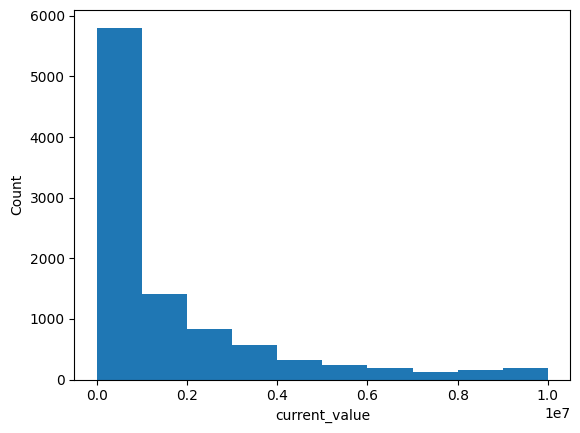

In [11]:
# Set data fields
y = dfValue.loc[:,'current_value']

# Set histogram parameters
binwidth = 1000000.0
binrange=np.arange(min(y), 10000000 + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('current_value')
plt.ylabel('Count')
plt.show()

#### Histogram of values where the bins cover $100000 increments to see more detailed distribution of players according to their current_values:

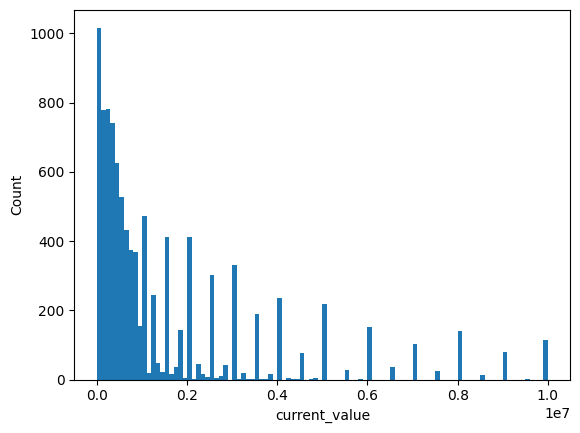

In [12]:
# Set data fields
y = dfValue.loc[:,'current_value']

# Set histogram parameters
binwidth = 100000.0
binrange=np.arange(min(y), 10000000 + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('current_value')
plt.ylabel('Count')
plt.show()

Even if the second histogram is more detailed, peak point of each bin in histograms are similar.

Interestingly, according to regression model, the player having more awards tends to have lower current value but according to scatter plot, trend line is inclined.





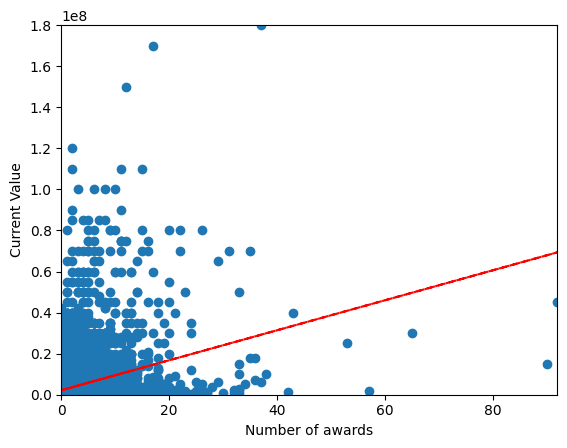

In [13]:
# Set data fields
x = dfValue.loc[:,'award']
y = dfValue.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfValue.loc[:,'award']))
plt.ylim(0,np.max(dfValue.loc[:,'current_value']))
plt.xlabel('Number of awards')
plt.ylabel('Current Value')
plt.show()

When distribution of each feature is checked, most of them have a majority count on value 0. Even The majority count in the data set consisting of minutes played, maximum value, and current value is 0.

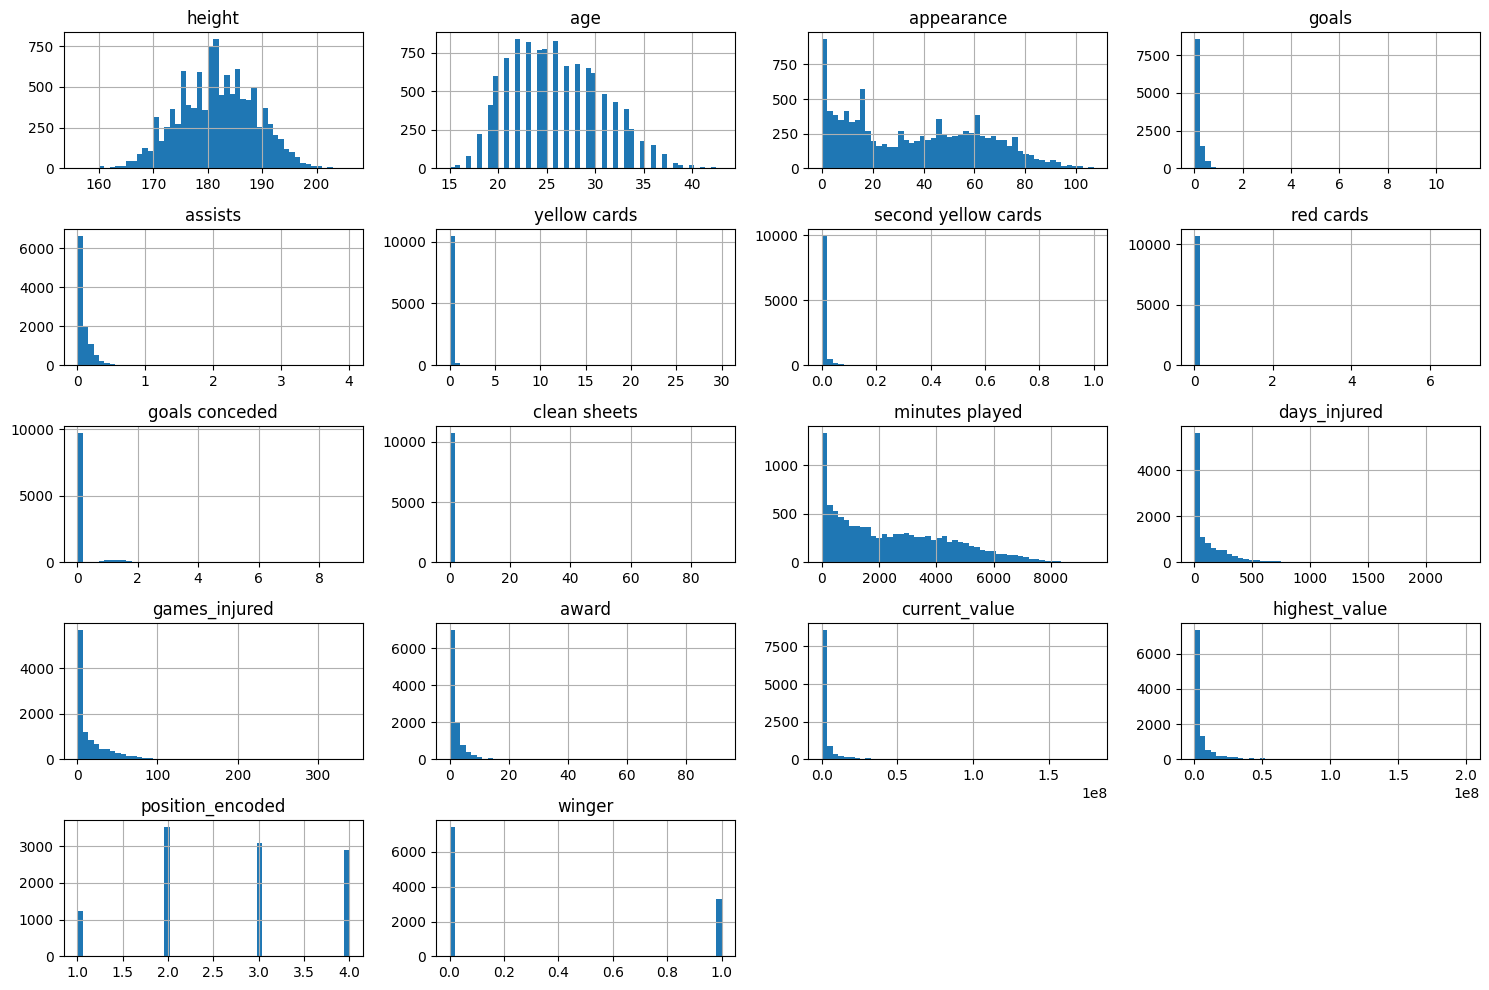

In [14]:
dfValue.hist(figsize=(15,10),bins=50)
plt.tight_layout()
plt.show()

#### To analyze correlation between players current value and other features, scatter plot is used

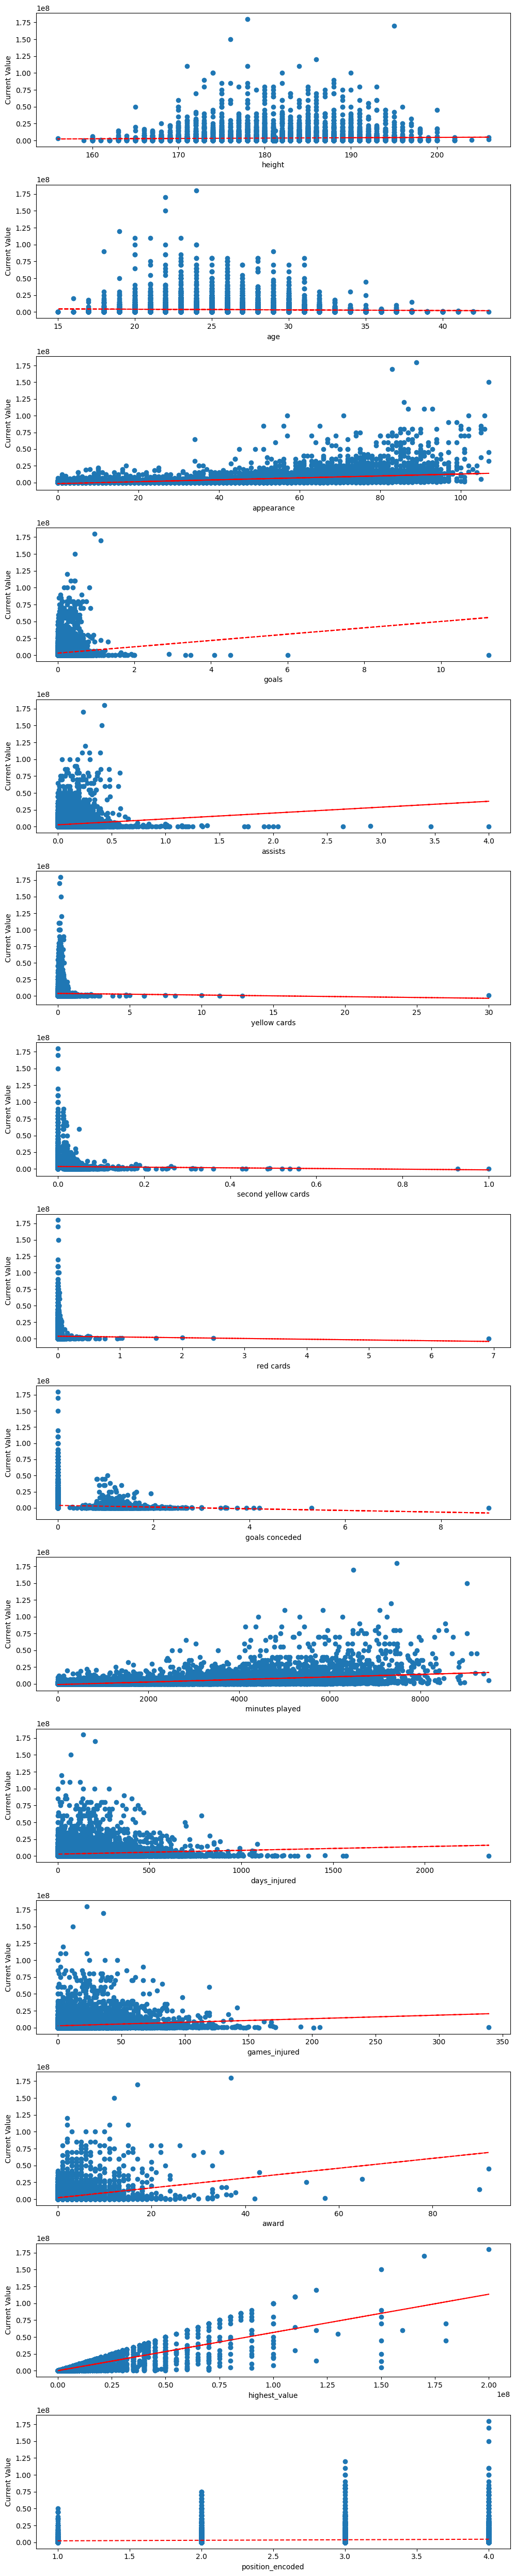

In [21]:
features = ['height','age','appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','minutes played','days_injured','games_injured','award','highest_value','position_encoded']
current_value = dfValue['current_value']

fig, axes = plt.subplots(len(features), 1, figsize=(10, 50))

for i, feature in enumerate(features):
    axes[i].scatter(dfValue[feature], current_value)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Current Value')
    z = np.polyfit(dfValue[feature], current_value, 1)
    p = np.poly1d(z)
    axes[i].plot(dfValue[feature], p(dfValue[feature]), "r--")

plt.tight_layout()
plt.show()

According to scatter plots above:

-Reasonablly, height has no correlation with current value of player.

-Interestingly, appeareance has positive correlation with current value and players having high appearence point tend to have more current value than prediction.

-Prediciton of age has no direct correlation with current value but player who aged between 20-35 tend to take higher current value than prediction.

-The current value of a player having more than 2 goals or 1 assist tends to have less current value than prediction.

-Players having higher highest value tend to have lower current value than prediciton.

-Other features have predictable plots.

##Conclusion

There are unreasonable findings:

-The regression model contradicts the scatter plot when the correlation of awards and current value is analyzed.

-The majority count in the data set consisting of minutes played, maximum value, and current value is 0.

These issues show used data set is not totally trustworthy.


utexas_ds_orie_divider_gray.png